In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline

In [2]:
df = pd.read_csv('Supermarket_sales_prediction.csv')

In [3]:
df.head(4)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape

(8523, 12)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
for col in df.columns:
    print(col,df[col].nunique())

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


In [8]:
df.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99]).style.background_gradient()

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

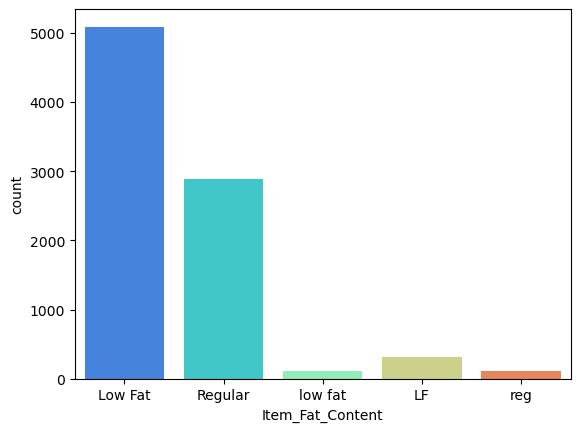

In [9]:
sns.countplot(x=df.Item_Fat_Content, data=df, palette='rainbow')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


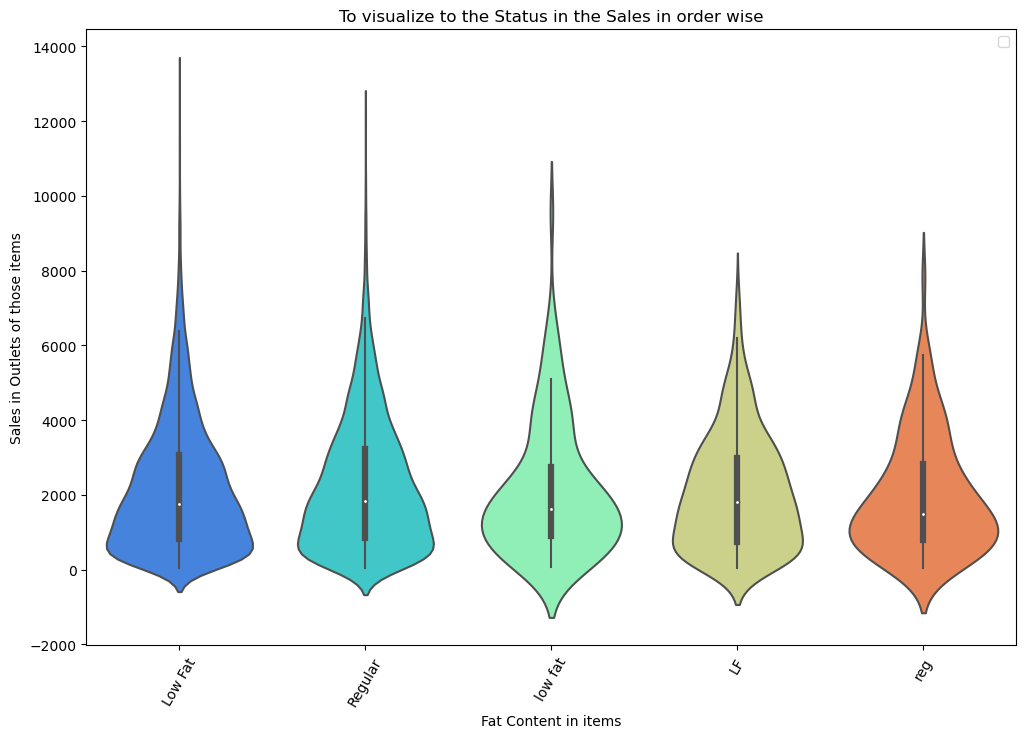

In [10]:
plt.figure(figsize=(12,8)) 
sns.violinplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales',palette="rainbow")
plt.xlabel('Fat Content in items')
plt.ylabel('Sales in Outlets of those items')
plt.xticks(rotation=60)
plt.title("To visualize to the Status in the Sales in order wise") 
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


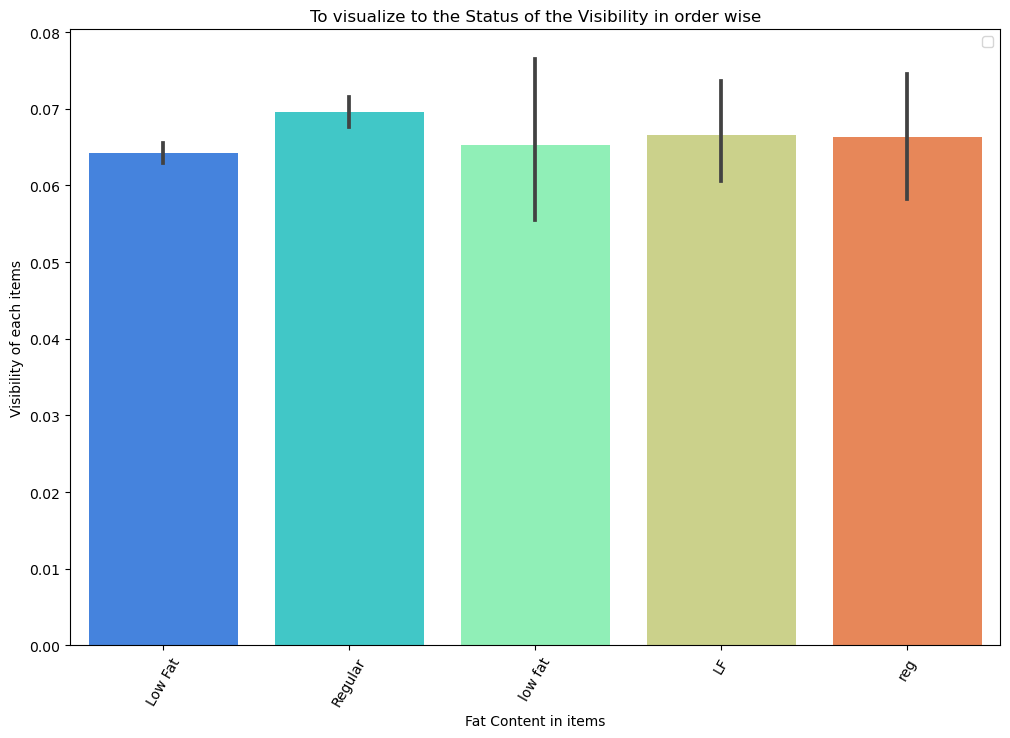

In [11]:
plt.figure(figsize=(12,8)) 
sns.barplot(data=df,x='Item_Fat_Content',y='Item_Visibility',palette="rainbow")
plt.xlabel('Fat Content in items')
plt.ylabel('Visibility of each items')
plt.xticks(rotation=60)
plt.title("To visualize to the Status of the Visibility in order wise") 
plt.legend()
plt.show()

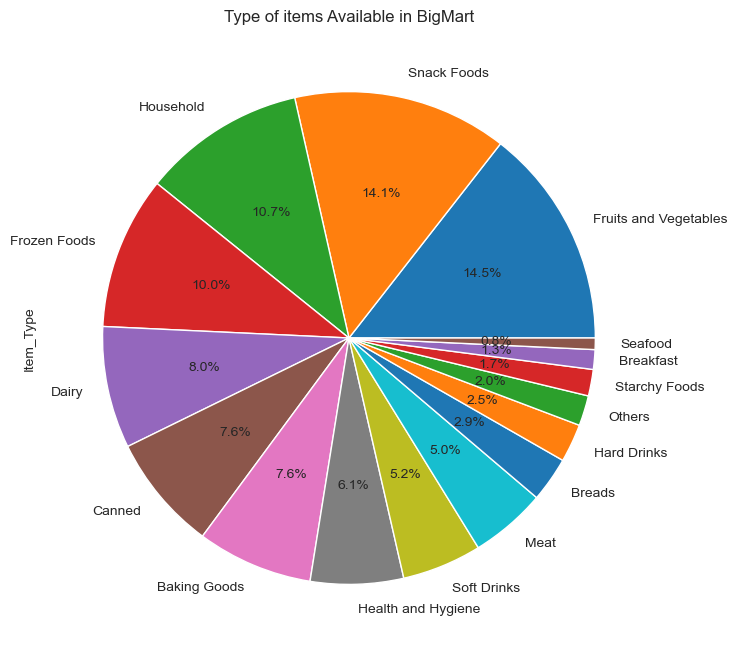

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
df['Item_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Type of items Available in BigMart')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


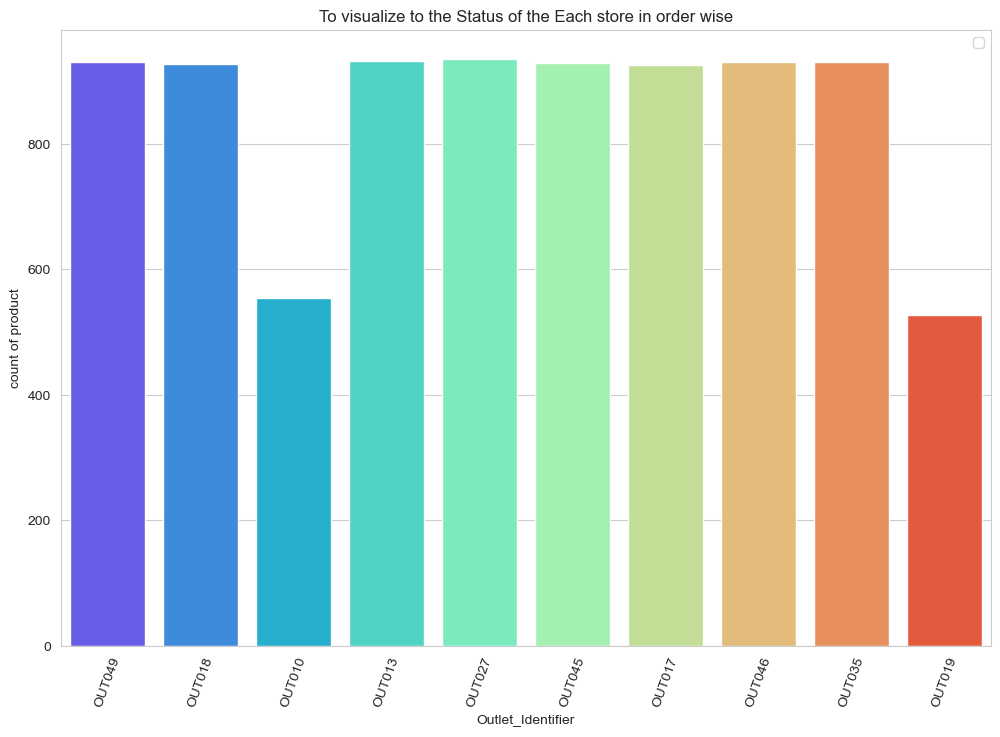

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Outlet_Identifier',palette="rainbow")
plt.xlabel('Outlet_Identifier')
plt.ylabel('count of product')
plt.xticks(rotation=70)
plt.title("To visualize to the Status of the Each store in order wise") 
plt.legend()
plt.show()

In [14]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

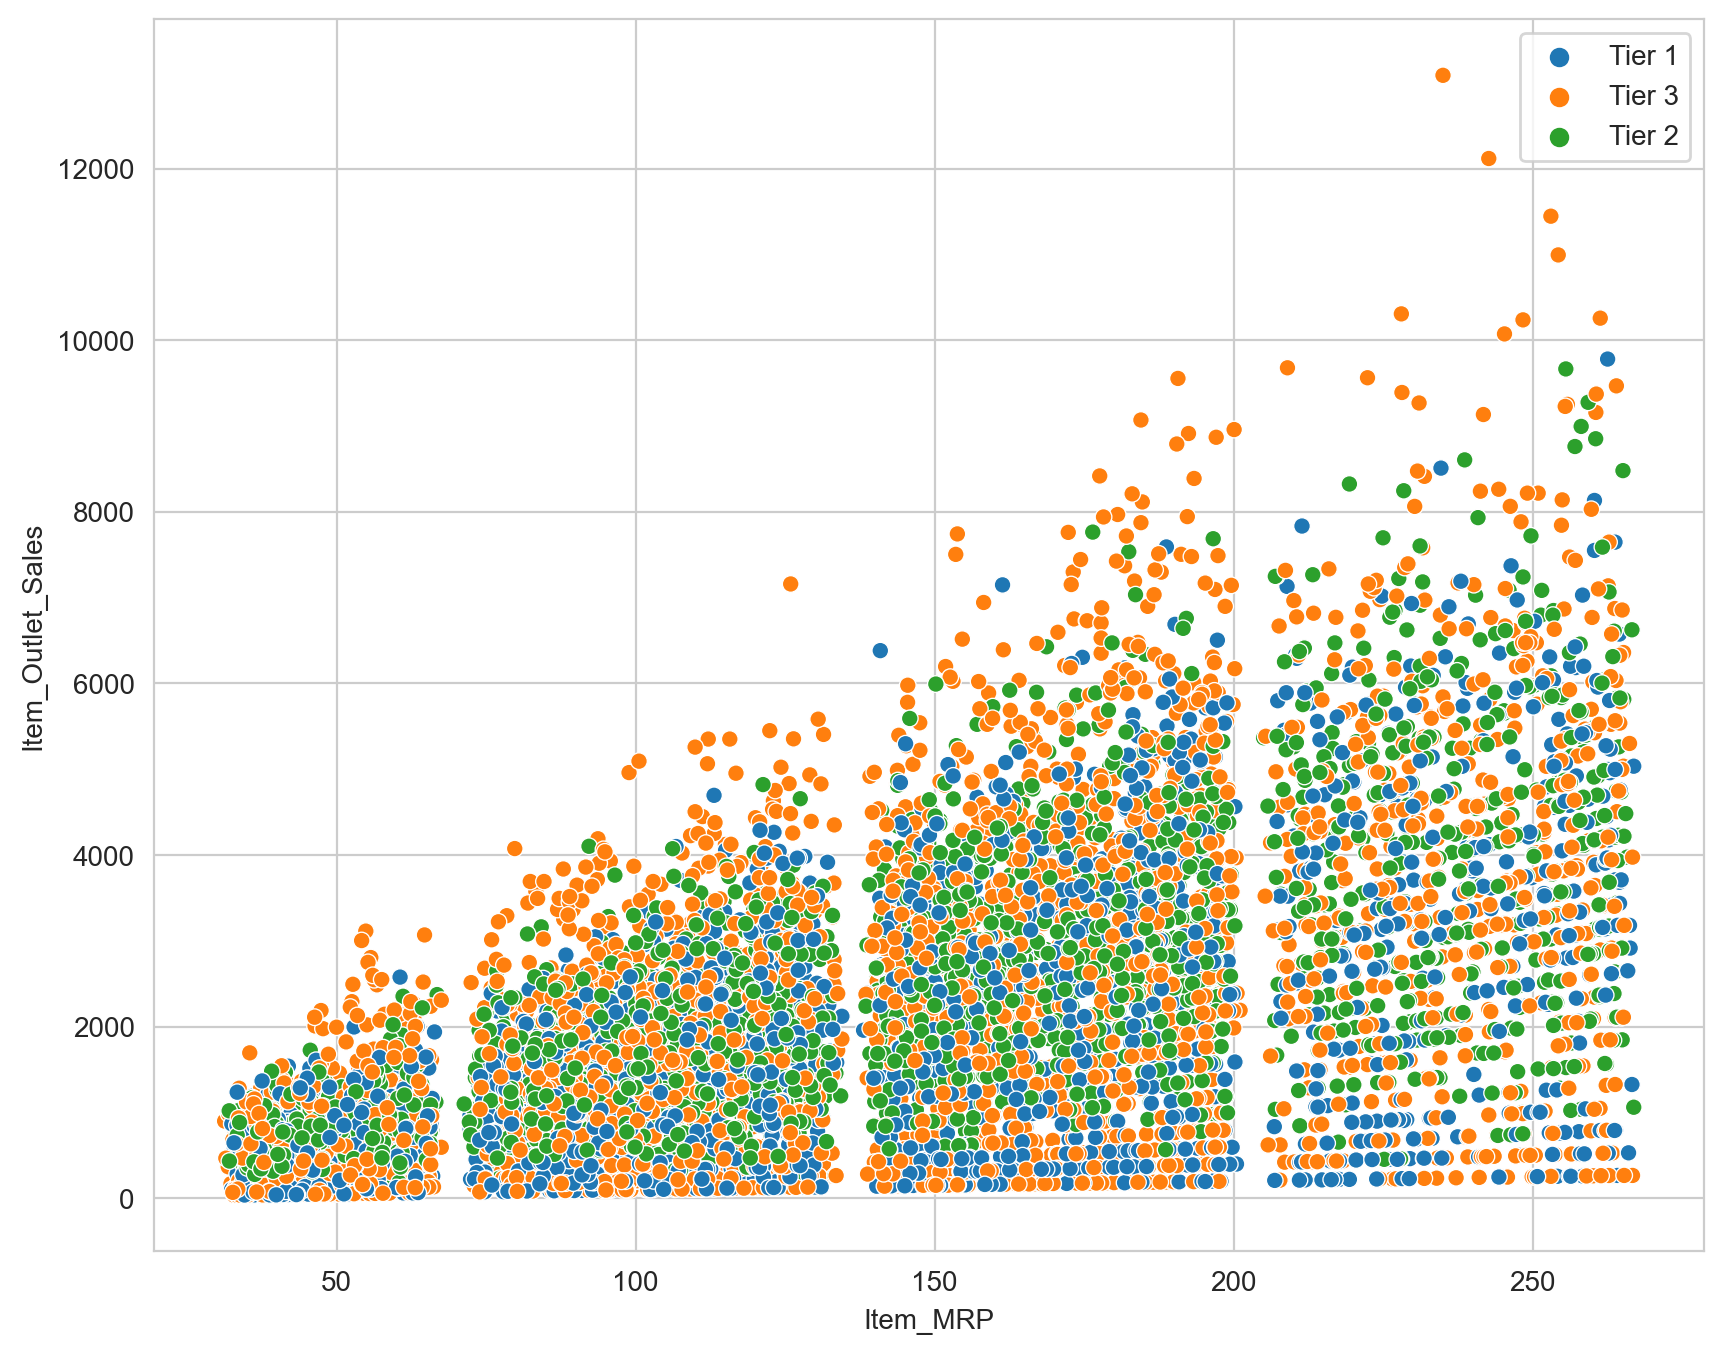

In [15]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=df)
plt.legend()
plt.show()

In [16]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
df['Outlet_Size'].fillna(method='ffill', inplace=True)

In [18]:
 df['Item_Weight'].mode()[0], df['Item_Weight'].mean().round(1)

(12.15, 12.9)

In [19]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

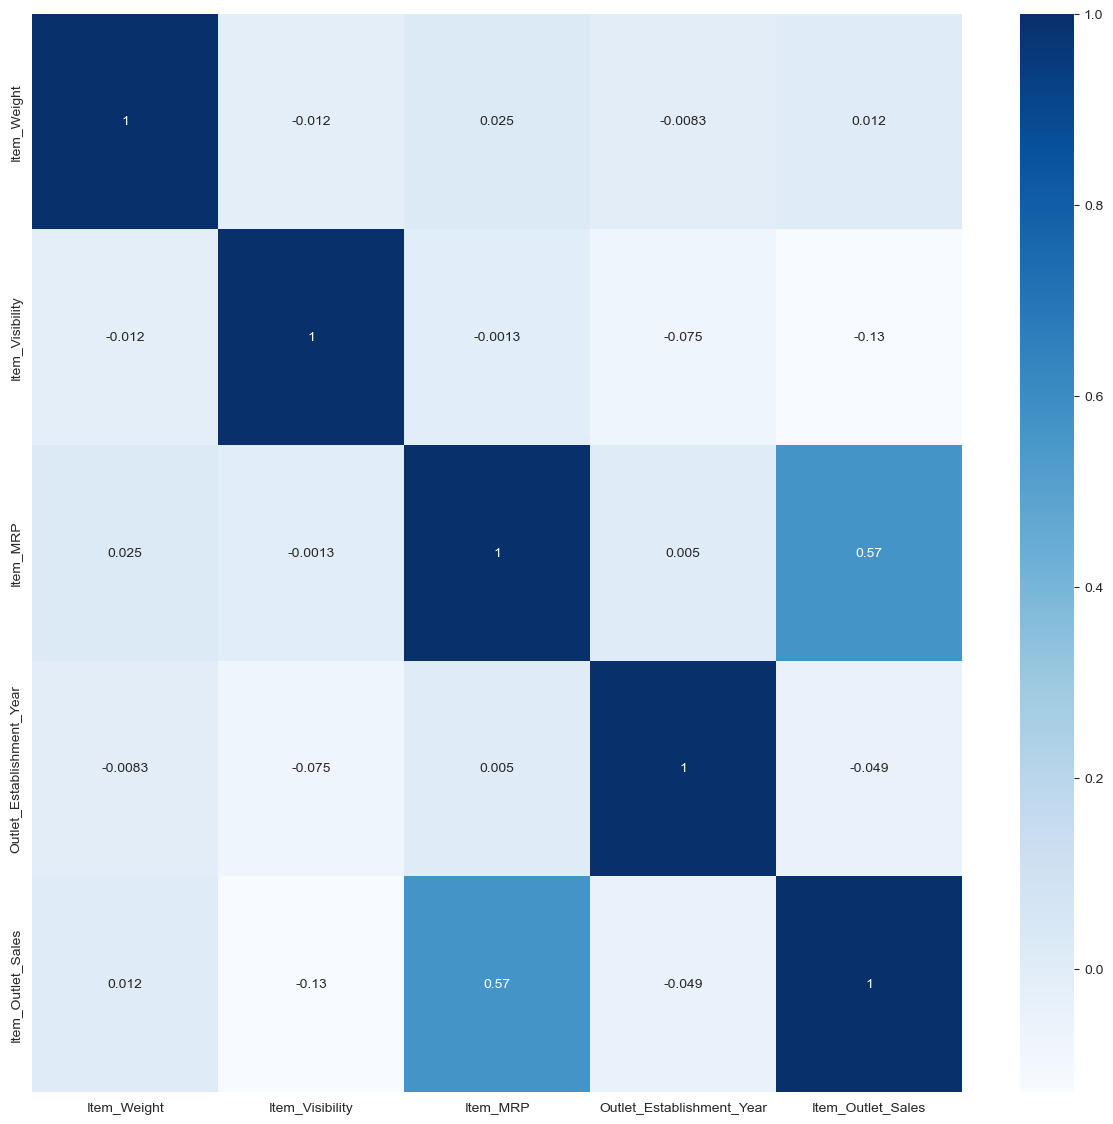

In [21]:
plt.figure(figsize=(15,14))
cr=df.corr()
sns.heatmap(cr,cmap='Blues',annot=True)
plt.show()

In [22]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [23]:
df.drop(columns=['Item_Identifier'],inplace=True)
df.drop(columns=['Outlet_Identifier'],inplace=True)

In [24]:
df1 = pd.get_dummies(df)

In [27]:
df1.head(3)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0          3735.1380                    0                         1   
1           443.4228                    0                         0   
2          2097.2700                    0                         1   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0                     0   
1                         1                         0                     0   
2                         0                         0                     0   

   Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 0                    0   

   Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                 0                1                       0   
1                 0                0                       0   
2                 0                0                       0   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                0                      0   
1                                0                      0   
2                                0                      0   

   Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0                    0               0   
1                             0                    0               0   
2                             0                    0               1   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_High  \
0                      0                        0                 0   
1                      1                        0                 0   
2                      0                        0                 0   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                   1                  0                            1   
1                   1                  0                            0   
2                   1                  0                            1   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              0   
2                          0                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0

In [28]:
X = df1.drop(columns='Item_Outlet_Sales')
y = df1['Item_Outlet_Sales']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

In [36]:
X_ScaledT = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

## LINEAR REGRESSOR

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
lr=LinearRegression()
lr.fit(X_Scaled,y_train)
LinearRegression()

LinearRegression()

In [69]:
y_test_pred=lr.predict(X_ScaledT)

In [70]:
r2 = r2_score(y_test,  y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R2 Score: 0.537041066569625
Mean Squared Error (MSE): 1398727.570303564
Root Mean Squared Error (RMSE): 1182.6781347025758
Mean Absolute Error (MAE): 876.4296131373362


## RANDOM FOREST REGRESSOR


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from math import sqrt

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=9, n_jobs=-1)
model.fit(X_Scaled, y_train)

RandomForestRegressor(max_depth=9, n_jobs=-1, random_state=42)

In [46]:
y_pred = model.predict(X_ScaledT)

In [48]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.5762563185177831
Mean Squared Error: 1280247.398272196
Root Mean Squared Error: 1131.4801802383442


## SUPPORT VECTOR REGRESSOR

In [63]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', degree=2)
svr.fit(X_Scaled, y_train)

SVR(degree=2, kernel='poly')

In [64]:
y_pred = svr.predict(X_ScaledT)

In [65]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: -0.03444657096927495
Mean Squared Error: 3125350.510248464
Root Mean Squared Error: 1767.8660894560041
